In [321]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [322]:
df = pd.read_csv("NewSunspot.csv")
df.drop(columns='Unnamed: 0', inplace=True)

In [323]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [ ]:

df['RollMean_11year'] = df['Sunspot'].rolling(window=132).mean()
df['RollStd_11year'] = df['Sunspot'].rolling(window=132).std()


df['Sunspot_lag1'] = df['Sunspot'].shift(1)
df['Sunspot_lag322'] = df['Sunspot'].shift(132)
 
df['Diff_11Year'] = df['Sunspot'].diff(periods=132)

df.dropna(inplace=True)

In [325]:
features = ['Year','Sunspot_lag1', 'Sunspot_lag2', 'Diff_11Year', 'RollMean_11year', 'RollStd_11year']
X = df[features]
y = df['Sunspot']

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [328]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [329]:
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [330]:
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

R² Score: 0.8873
MSE: 604.51
MAE: 18.08


In [331]:
results_df = X_test.copy()
results_df['Sunspot'] = y_test.values
results_df['Forecast_Sunspot'] = y_pred
results_df['Hata'] = y_test.values - y_pred
results_df.reset_index(drop=True, inplace=True)


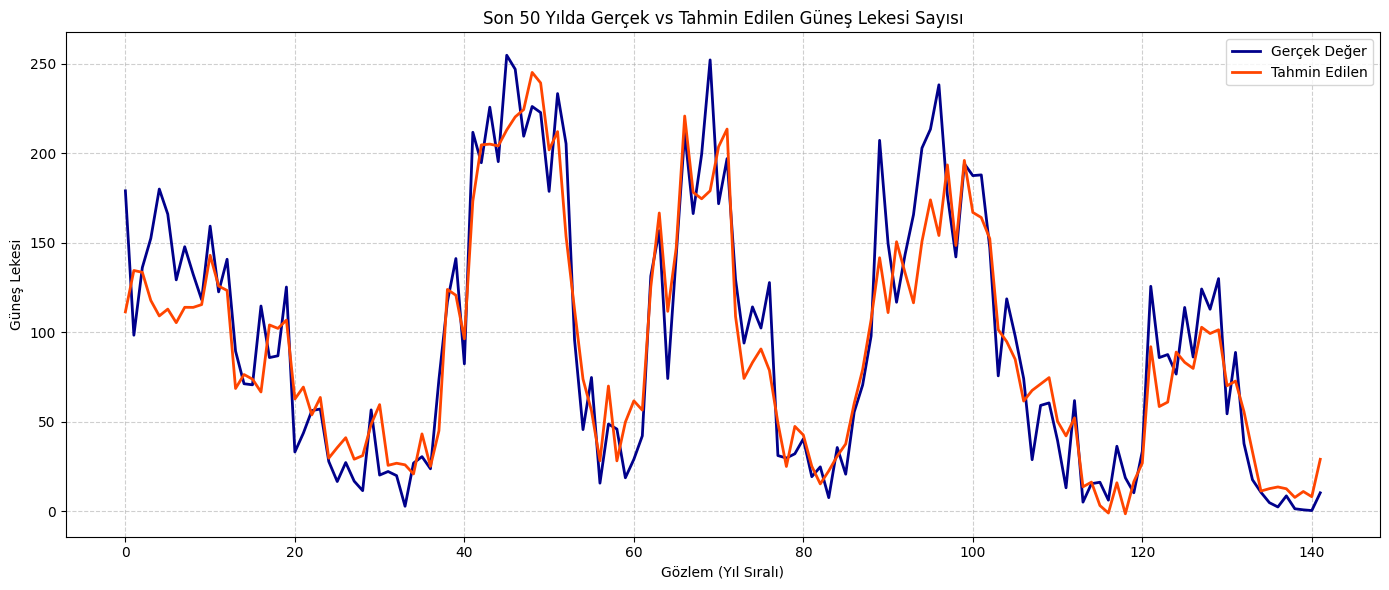

In [332]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Veriyi oku ve ön işleme
df = pd.read_csv("NewSunspot.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# 2. Özellik mühendisliği
df['RollMean_11year'] = df['Sunspot'].rolling(window=132).mean()
df['RollStd_11year'] = df['Sunspot'].rolling(window=132).std()
df['Sunspot_lag1'] = df['Sunspot'].shift(1)
df['Sunspot_lag2'] = df['Sunspot'].shift(2)
df['Diff_11Year'] = df['Sunspot'].diff(periods=132)
df.dropna(inplace=True)

# 3. Modelleme
features = ['Year', 'Sunspot_lag1', 'Sunspot_lag2', 'Diff_11Year', 'RollMean_11year', 'RollStd_11year']
X = df[features]
y = df['Sunspot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 4. Sonuçları birleştir
results_df = X_test.copy()
results_df['Sunspot'] = y_test.values
results_df['Forecast_Sunspot'] = y_pred
results_df['Year'] = X_test['Year'].values
results_df.reset_index(drop=True, inplace=True)

# 5. Son 50 yılı filtrele
latest_years = sorted(results_df['Year'].unique())[-50:]
recent_results_df = results_df[results_df['Year'].isin(latest_years)].sort_values('Year').reset_index(drop=True)

# 6. Grafik çizimi
plt.figure(figsize=(14, 6))
plt.plot(recent_results_df['Sunspot'].values, label='Gerçek Değer', color='darkblue', linewidth=2)
plt.plot(recent_results_df['Forecast_Sunspot'].values, label='Tahmin Edilen', color='orangered', linewidth=2)
plt.title("Son 50 Yılda Gerçek vs Tahmin Edilen Güneş Lekesi Sayısı")
plt.xlabel("Gözlem (Yıl Sıralı)")
plt.ylabel("Güneş Lekesi")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
